In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns

# Determining training epochs

The below code is meant to help determine the right number of training epochs for each task and domain

In [2]:
domains = ["laptop","rest"]
model = ["pt"]
tasks = ["ae_spanbert-base-cased","asc_spanbert-base-cased"]
prefix = "run/"
runs = 5
file = "valid.json"

# tasks=["ae_spanbert-base-cased"]
# berts=["pt"]
# domains=["laptop"]
# runs=5
# testing=True
# %run eval/eval.ipynb

In [3]:
data = []
for m in model:
    for t in tasks:
        for d in domains:
            for i in range(1,runs+1):
                path = prefix+m+"_"+t+"/"+d+"/"+str(i)+"/"+file
                losses = json.load(open(path, 'r'))["valid_losses"]
                for epoch in range(len(losses)):
                    data.append(
                        {
                            "model":m,
                            "task":t,
                            "domain":d,
                            "run":i,
                            "epoch":epoch+1,
                            "valid_loss": losses[epoch]
                        }
                    )
data = pd.DataFrame(data)
data

,model,task,domain,run,epoch,valid_loss
0,pt,ae_spanbert-base-cased,laptop,1,1,107.056570
1,pt,ae_spanbert-base-cased,laptop,1,2,115.502769
2,pt,ae_spanbert-base-cased,laptop,1,3,154.490136
3,pt,ae_spanbert-base-cased,laptop,1,4,155.667271
4,pt,ae_spanbert-base-cased,laptop,2,1,107.136830
...,...,...,...,...,...,...
75,pt,asc_spanbert-base-cased,rest,4,4,2.551570
76,pt,asc_spanbert-base-cased,rest,5,1,3.116213
77,pt,asc_spanbert-base-cased,rest,5,2,2.465906
78,pt,asc_spanbert-base-cased,rest,5,3,2.340996


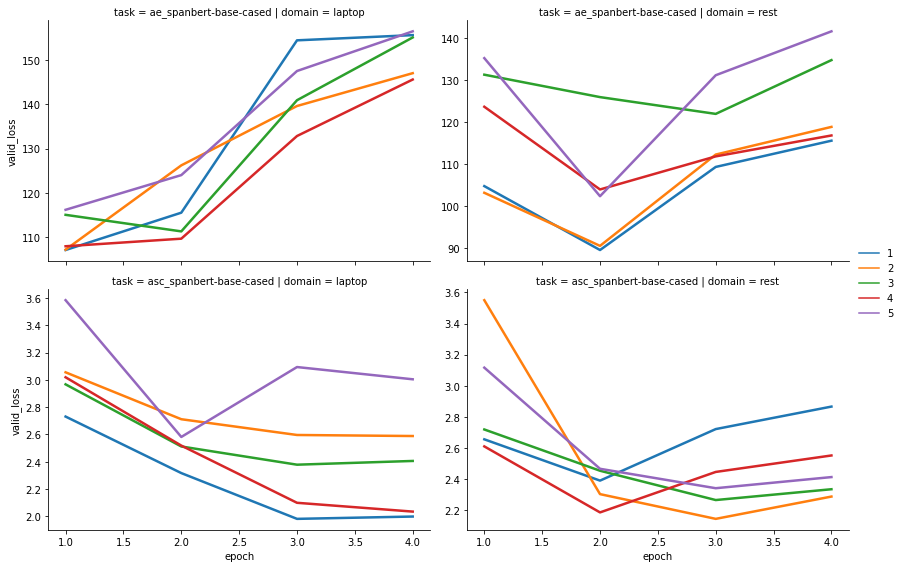

In [4]:
g = sns.FacetGrid(data, col="domain", row="task", sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x="epoch",
         y="valid_loss",
         hue="run",
         palette="tab10", 
         linewidth=2.5)
g.add_legend()
g.savefig("validation_losses.png");

In [5]:
data.groupby(by=["model","task","domain","epoch"])[["valid_loss"]]\
    .mean()\
    .reset_index()\
    .pivot(index=["model","task","domain"], columns=["epoch"])

valid_loss                          \
epoch                                          1           2           3   
model task                    domain                                       
pt    ae_spanbert-base-cased  laptop  110.653609  117.320432  143.092457   
                              rest    119.640948  102.523725  117.335851   
      asc_spanbert-base-cased laptop    3.071878    2.528206    2.429854   
                              rest      2.930023    2.359509    2.383348   

                                                  
epoch                                          4  
model task                    domain              
pt    ae_spanbert-base-cased  laptop  152.003497  
                              rest    125.534314  
      asc_spanbert-base-cased laptop    2.406349  
                              rest      2.490366